<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/3.CNN/%5B%E1%84%80%E1%85%B3%E1%86%B7%E1%84%8B%E1%85%B2%E1%86%BC_AI%5D_LSTM%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%92%E1%85%AA%E1%86%AF%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8C%E1%85%AE%E1%84%80%E1%85%A1%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[4편] 인간의 기억력을 흉내 낸 인공지능 - LSTM/[12장] LSTM 활용하기/4_12_2_[금융 AI] LSTM을 활용한 주가예측

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[4편] 인간의 기억력을 흉내 낸 인공지능 - LSTM/[12장] LSTM 활용하기/4_12_2_[금융 AI] LSTM을 활용한 주가예측


In [2]:
import data_reader
from tensorflow import keras

In [3]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 100  # 예제 기본값은 100입니다.

In [4]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader(14)



Data Read Done!
Training X Size : (2507, 14, 6)
Training Y Size : (2507, 14, 5)
Test X Size : (106, 14, 6)
Test Y Size : (106, 14, 5)




In [5]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(5)
])

In [6]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mae", metrics=["mse"])

In [7]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/100
79/79 [==============================] - 8s 42ms/step - loss: 0.0266 - mse: 0.0028 - val_loss: 0.0801 - val_mse: 0.0077
Epoch 2/100
79/79 [==============================] - 3s 32ms/step - loss: 0.0125 - mse: 3.2959e-04 - val_loss: 0.0663 - val_mse: 0.0055
Epoch 3/100
79/79 [==============================] - 2s 32ms/step - loss: 0.0121 - mse: 3.1083e-04 - val_loss: 0.0670 - val_mse: 0.0055
Epoch 4/100
79/79 [==============================] - 3s 32ms/step - loss: 0.0117 - mse: 2.9875e-04 - val_loss: 0.0650 - val_mse: 0.0052
Epoch 5/100
79/79 [==============================] - 2s 31ms/step - loss: 0.0116 - mse: 2.8477e-04 - val_loss: 0.0464 - val_mse: 0.0051
Epoch 6/100
79/79 [==============================] - 2s 28ms/step - loss: 0.0113 - mse: 2.8001e-04 - val_loss: 0.0517 - val_mse: 0.0044
Epoch 7/100
79/79 [==============================] - 3s 33ms/step - loss: 0.0120 - mse: 3.1434e-04 - val_loss: 0.0498 - val_mse: 0.0045
Epoch 8/

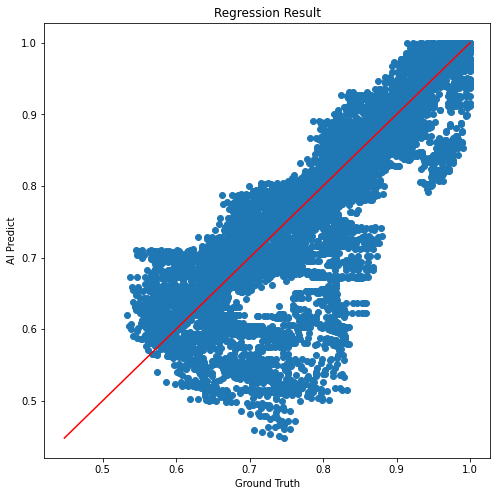

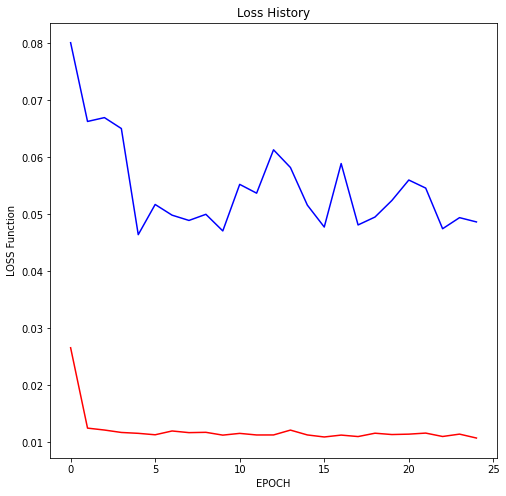

In [8]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)